In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
dataset_path = 'data/wustl_iiot_2021.csv'
df = pd.read_csv(dataset_path)

In [5]:
df.head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,2019-08-19 12:23:28,2019-08-19 12:23:28,192.168.0.20,192.168.0.2,0,59034,502,10,8,18,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,2019-08-19 15:13:24,2019-08-19 15:13:24,192.168.0.20,192.168.0.2,0,55841,502,10,8,18,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,2019-08-19 13:41:31,2019-08-19 13:41:31,192.168.0.20,192.168.0.2,0,63774,502,10,8,18,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,2019-08-19 12:43:19,2019-08-19 12:43:20,209.240.235.92,192.168.0.2,0,61771,80,4,0,4,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,2019-08-19 14:49:44,2019-08-19 14:49:48,192.168.0.20,192.168.0.1,3,0,0,14,0,14,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [59]:
df.sort_values(by='StartTime').head()

,StartTime,LastTime,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
165346,2019-08-19 09:46:03,2019-08-19 09:46:03,0,60821,502,10,8,18,508,644,...,24,20,44,0.001293,0.054280,0,0.0,0.0,normal,0
886055,2019-08-19 09:46:03,2019-08-19 09:46:03,0,60839,502,10,8,18,508,644,...,24,20,44,0.000965,0.053680,0,0.0,0.0,normal,0
839154,2019-08-19 09:46:03,2019-08-19 09:46:03,0,60825,502,6,6,12,384,396,...,24,20,44,0.000624,0.032224,0,0.0,0.0,normal,0
822422,2019-08-19 09:46:03,2019-08-19 09:46:03,0,60845,502,10,8,18,508,644,...,24,20,44,0.001247,0.054004,0,0.0,0.0,normal,0
582302,2019-08-19 09:46:03,2019-08-19 09:46:03,0,60837,502,6,6,12,384,396,...,24,20,44,0.000656,0.029514,0,0.0,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194464 entries, 0 to 1194463
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   StartTime   1194464 non-null  object 
 1   LastTime    1194464 non-null  object 
 2   SrcAddr     1194464 non-null  object 
 3   DstAddr     1194464 non-null  object 
 4   Mean        1194464 non-null  int64  
 5   Sport       1194464 non-null  int64  
 6   Dport       1194464 non-null  int64  
 7   SrcPkts     1194464 non-null  int64  
 8   DstPkts     1194464 non-null  int64  
 9   TotPkts     1194464 non-null  int64  
 10  DstBytes    1194464 non-null  int64  
 11  SrcBytes    1194464 non-null  int64  
 12  TotBytes    1194464 non-null  int64  
 13  SrcLoad     1194464 non-null  float64
 14  DstLoad     1194464 non-null  float64
 15  Load        1194464 non-null  float64
 16  SrcRate     1194464 non-null  float64
 17  DstRate     1194464 non-null  float64
 18  Rate        1194464 no

In [6]:
df.describe()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dIpId,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target
count,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,...,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06
mean,1.286870e-01,5.445253e+04,7.907604e+02,1.665579e+02,1.688389e+01,1.756631e+02,7.601579e+03,1.938043e+04,2.779692e+05,1.571207e+07,...,2.956785e+04,2.192527e+02,7.051507e+03,6.581117e+05,1.801930e-03,1.994698e-01,7.531412e-03,6.189383e+01,2.653724e-01,7.284941e-02
std,6.859156e-01,1.200834e+04,3.299492e+03,5.266192e+04,1.137763e+03,5.266221e+04,7.508699e+05,4.730229e+06,1.918939e+07,8.339078e+07,...,2.027684e+04,2.852114e+03,7.445876e+05,4.167380e+07,5.485539e-02,7.966451e-01,7.442284e-01,4.143742e+02,5.001929e+00,2.598893e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.221800e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.514543e+04,...,1.117100e+04,2.400000e+01,2.000000e+01,4.400000e+01,6.310000e-04,5.134900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.663500e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.818777e+04,...,2.934000e+04,2.400000e+01,2.000000e+01,4.400000e+01,6.750000e-04,5.206700e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.104300e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.968784e+04,...,4.686000e+04,2.400000e+01,2.000000e+01,4.400000e+01,8.020000e-04,5.324900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.765721e+06,6.552200e+04,2.773967e+07,3.092160e+05,2.773967e+07,8.251559e+07,2.108646e+09,2.143725e+09,1.156000e+09,...,6.553500e+04,9.979300e+04,8.182314e+07,4.293700e+09,3.036730e+00,5.103213e+00,2.070000e+02,4.999440e+03,7.695150e+02,1.000000e+00


In [10]:
df.shape

(1194464, 49)

In [11]:
df.isnull().sum().sum()

0

In [14]:
#checking for duplicates
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)

No duplicates found


In [15]:
df.columns

Index(['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'Mean', 'Sport', 'Dport',
       'SrcPkts', 'DstPkts', 'TotPkts', 'DstBytes', 'SrcBytes', 'TotBytes',
       'SrcLoad', 'DstLoad', 'Load', 'SrcRate', 'DstRate', 'Rate', 'SrcLoss',
       'DstLoss', 'Loss', 'pLoss', 'SrcJitter', 'DstJitter', 'SIntPkt',
       'DIntPkt', 'Proto', 'Dur', 'TcpRtt', 'IdleTime', 'Sum', 'Min', 'Max',
       'sDSb', 'sTtl', 'dTtl', 'sIpId', 'dIpId', 'SAppBytes', 'DAppBytes',
       'TotAppByte', 'SynAck', 'RunTime', 'sTos', 'SrcJitAct', 'DstJitAct',
       'Traffic', 'Target'],
      dtype='object')

In [13]:
df.dtypes

StartTime      object
LastTime       object
SrcAddr        object
DstAddr        object
Mean            int64
Sport           int64
Dport           int64
SrcPkts         int64
DstPkts         int64
TotPkts         int64
DstBytes        int64
SrcBytes        int64
TotBytes        int64
SrcLoad       float64
DstLoad       float64
Load          float64
SrcRate       float64
DstRate       float64
Rate          float64
SrcLoss         int64
DstLoss         int64
Loss            int64
pLoss         float64
SrcJitter     float64
DstJitter     float64
SIntPkt       float64
DIntPkt       float64
Proto           int64
Dur           float64
TcpRtt        float64
IdleTime        int64
Sum           float64
Min           float64
Max           float64
sDSb            int64
sTtl            int64
dTtl            int64
sIpId           int64
dIpId           int64
SAppBytes       int64
DAppBytes       int64
TotAppByte      int64
SynAck        float64
RunTime       float64
sTos            int64
SrcJitAct 

In [16]:
df.select_dtypes(include = ['object']).nunique()

StartTime    25267
LastTime     25276
SrcAddr         14
DstAddr        132
Traffic          5
dtype: int64

In [26]:
#remove these columns: 'StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId', 
#as they are unique to the attacks and would expose the type of the attack to the model.
#But let's keep the 'StartTime', 'LastTime' to timestamp to datastream

df.drop(columns=['SrcAddr', 'DstAddr', 'sIpId', 'dIpId'], inplace = True)

In [24]:
#We reviewed the potential features, using Argus tool [5], and chose 41 features that are common in network flows and also change during the attack phases

In [27]:
df_num_cols = df.select_dtypes(include=['float64', 'int64'])

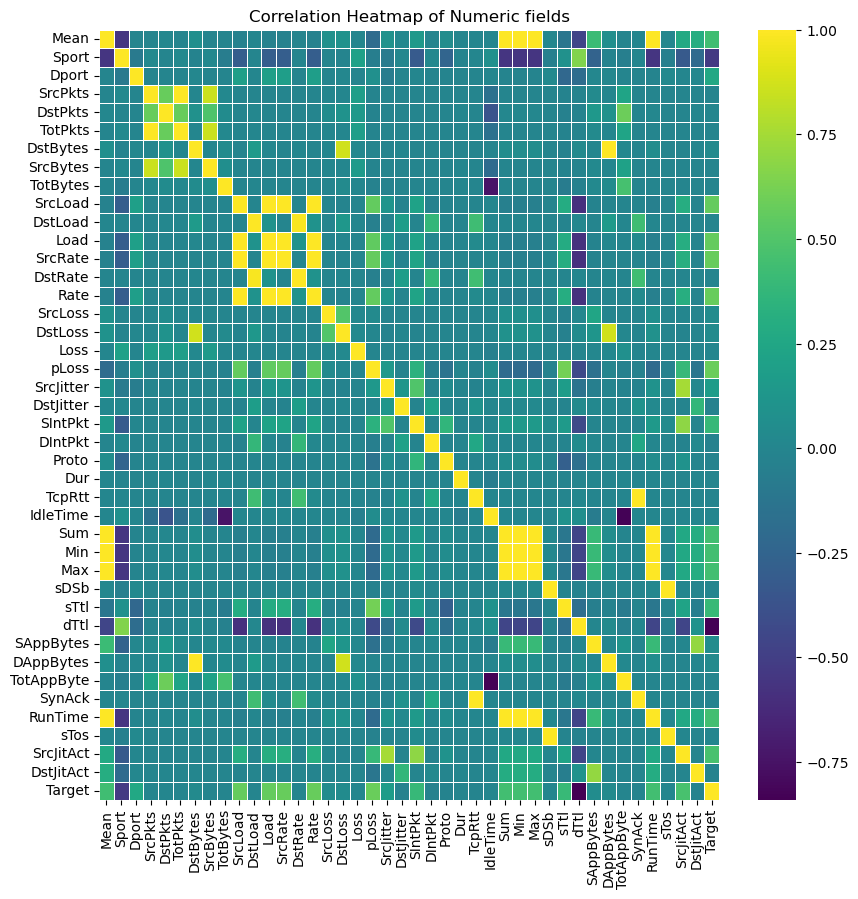

In [40]:
attack_matrix = df_num_cols.corr()
plt.figure(figsize=(10,10))
sns.heatmap(attack_matrix, annot=False, cmap='viridis', linewidths=0.5, cbar = True)
plt.title('Correlation Heatmap of Numeric fields')
plt.show()

In [33]:
attack_correlation = correlation_matrix['Target'].abs().sort_values(ascending=False)
print(attack_correlation)

Target        1.000000
dTtl          0.841005
pLoss         0.581019
SrcRate       0.572488
Rate          0.569869
SrcLoad       0.564542
Load          0.562247
Sport         0.526537
SrcJitAct     0.465424
RunTime       0.444214
Max           0.444214
Min           0.444214
Sum           0.444214
Mean          0.438709
sTtl          0.399840
SIntPkt       0.392936
Dport         0.264351
SrcJitter     0.167864
SrcLoss       0.044886
SAppBytes     0.044592
DstLoss       0.041887
DstBytes      0.033004
DAppBytes     0.032992
DIntPkt       0.030751
DstJitter     0.022233
DstJitAct     0.014865
Proto         0.014662
TcpRtt        0.009344
SynAck        0.009196
DstRate       0.005209
IdleTime      0.004856
sDSb          0.004674
sTos          0.004643
TotAppByte    0.003785
TotBytes      0.002616
Loss          0.001082
DstPkts       0.001034
SrcBytes      0.000979
SrcPkts       0.000674
TotPkts       0.000610
Dur           0.000343
DstLoad       0.000008
Name: Target, dtype: float64


In [36]:
attack_count = (df['Target'] == 1).sum()
normal_count = (df['Target'] == 0).sum()

print("Number of attacks in network trafic:", attack_count)
print("Number of normals in network trafic:", normal_count)

Number of attacks in network trafic: 87016
Number of normals in network trafic: 1107448


<Figure size 1000x600 with 0 Axes>

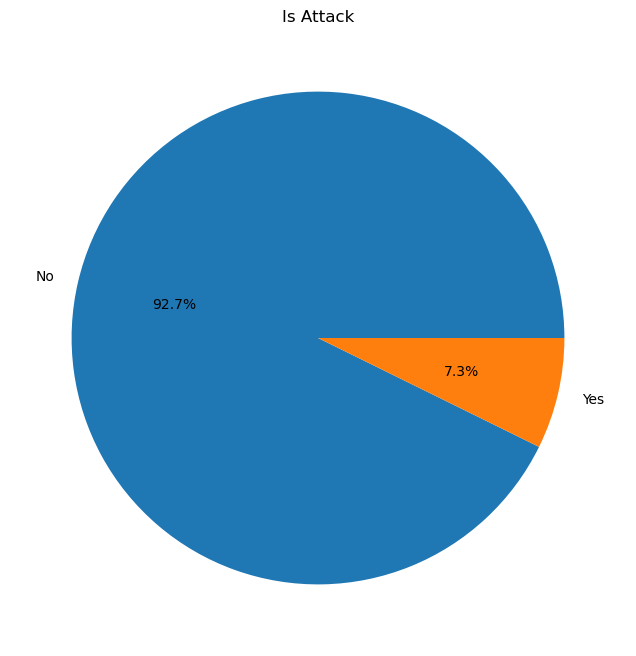

In [37]:
#Proportion of attacks in network traffic
plt.figure(figsize = (10, 6))
is_attack_count = df['Target'].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(is_attack_count, labels = ['No', 'Yes'], autopct="%0.1f%%")
plt.title('Is Attack')
plt.show()
#Conclusion: Imbalanced dataset

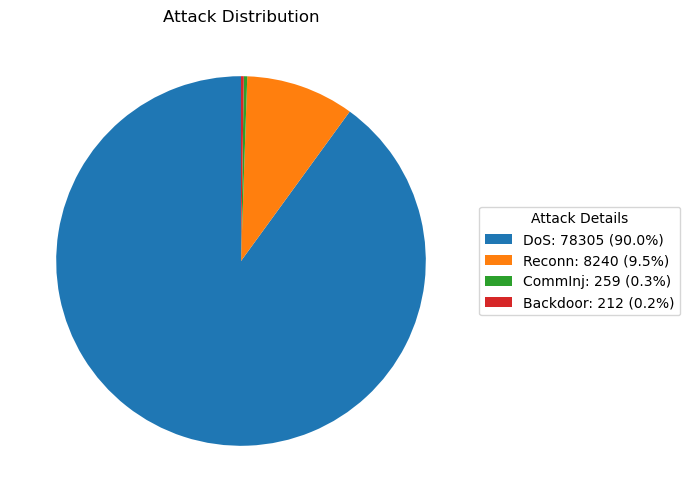

In [57]:
# Value to exclude
value_to_exclude = 'normal'

# Filter out the major value
filtered_df = df[df['Traffic'] != value_to_exclude]

category_counts = filtered_df['Traffic'].value_counts()
total_count = category_counts.sum()

legend_labels = [
    f"{category}: {count} ({count / total_count:.1%})"
    for category, count in category_counts.items()
]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(
    category_counts,
    labels=None,  # No labels on the chart
    startangle=90
)

# Add a legend with counts and proportions
ax.legend(
    wedges,
    legend_labels,
    title="Attack Details",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Places legend to the right of the chart
)

# Add a title and display the plot
plt.title(f'Attack Distribution')
plt.show()